In [2]:
# 导入必要的数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('iris.csv', index_col=0) 

# 查看数据基本信息
print("Dataset Shape = ", df.shape)
print("\nData")
print(df)


print("\nDataset Info")
print(df.info())

Dataset Shape =  (150, 5)

Data
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
1             5.1          3.5           1.4          0.2     setosa
2             4.9          3.0           1.4          0.2     setosa
3             4.7          3.2           1.3          0.2     setosa
4             4.6          3.1           1.5          0.2     setosa
5             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
146           6.7          3.0           5.2          2.3  virginica
147           6.3          2.5           5.0          1.9  virginica
148           6.5          3.0           5.2          2.0  virginica
149           6.2          3.4           5.4          2.3  virginica
150           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Dataset Info
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 # 

In [3]:
# 基本描述统计信息
print("数据集描述统计：")
print(df.describe())

print("\n各个种类的数量统计：")
print(df['Species'].value_counts())

print("\n按种类分组的描述统计：")
print(df.groupby('Species').describe())

# 检查缺失值
print("\n缺失值统计：")
print(df.isnull().sum())

数据集描述统计：
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

各个种类的数量统计：
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

按种类分组的描述统计：
           Sepal.Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9

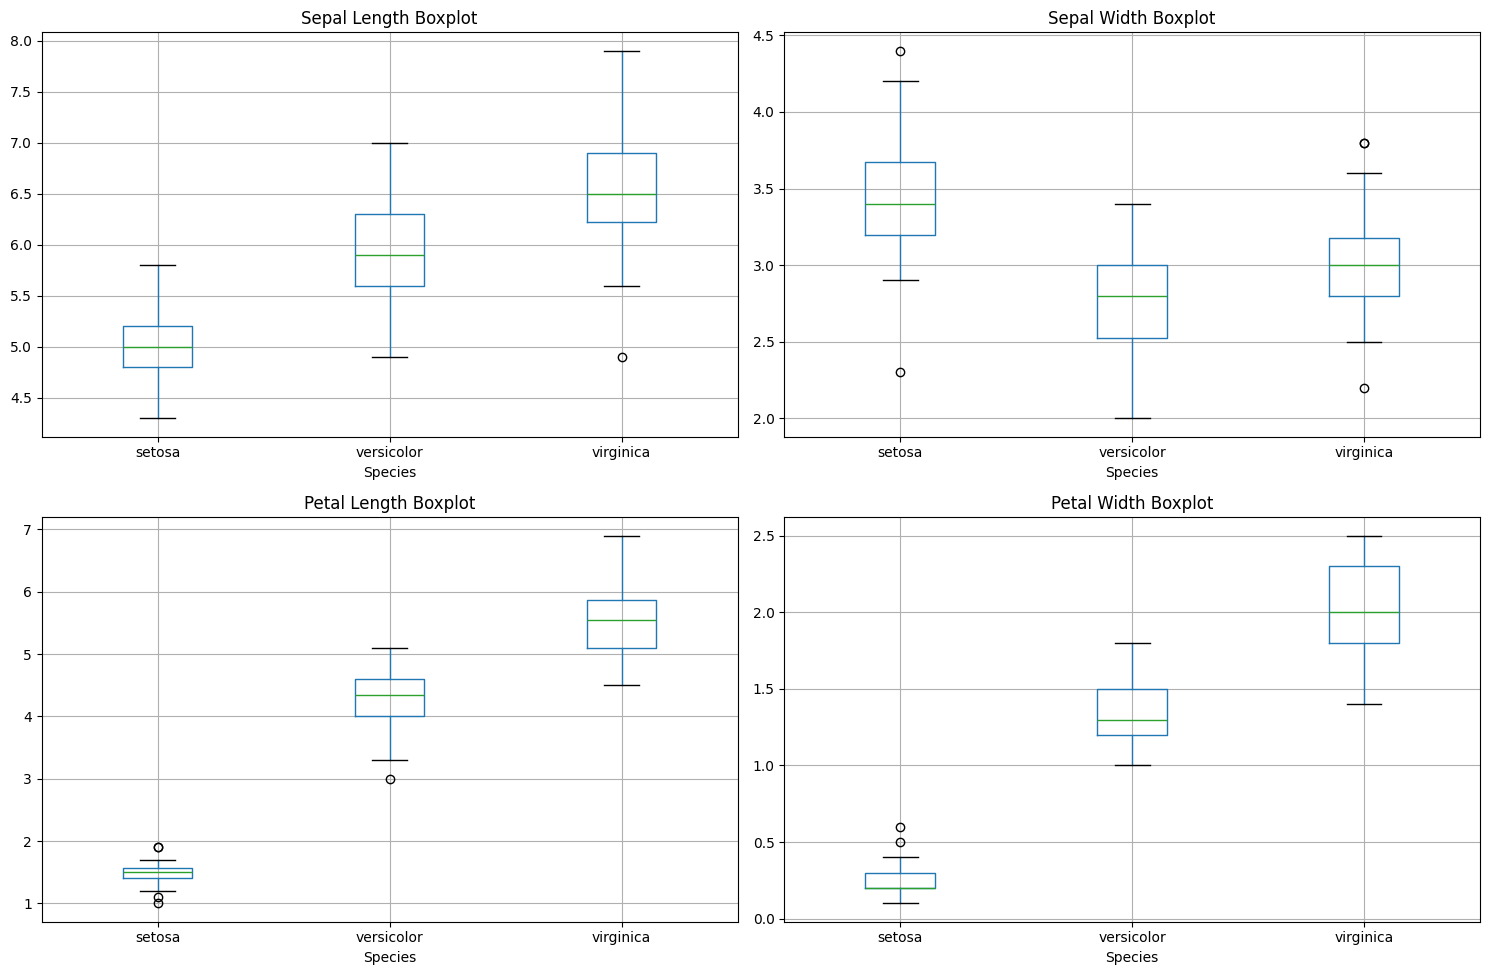

<Figure size 1500x400 with 0 Axes>

In [4]:
# Set figure size
plt.figure(figsize=(15, 10))

# Create 2x2 subplots
plt.subplot(2, 2, 1)
df.boxplot(column='Sepal.Length', by='Species', ax=plt.gca())
plt.title('Sepal Length Boxplot')
plt.suptitle('')  # Remove default title

plt.subplot(2, 2, 2)
df.boxplot(column='Sepal.Width', by='Species', ax=plt.gca())
plt.title('Sepal Width Boxplot') 
plt.suptitle('')

plt.subplot(2, 2, 3)
df.boxplot(column='Petal.Length', by='Species', ax=plt.gca())
plt.title('Petal Length Boxplot')
plt.suptitle('')

plt.subplot(2, 2, 4)
df.boxplot(column='Petal.Width', by='Species', ax=plt.gca())
plt.title('Petal Width Boxplot')
plt.suptitle('')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))

plt.tight_layout()
plt.show()

In [5]:
# 计算10%和90%分位数
print("各特征的10%和90%分位数：")
quantiles = df.select_dtypes(include=[np.number]).quantile([0.1, 0.9])
print(quantiles)

print("\n各特征按种类分组的10%和90%分位数：")
for species in df['Species'].unique():
    print(f"\n{species}种类：")
    species_data = df[df['Species'] == species].select_dtypes(include=[np.number])
    print(species_data.quantile([0.1, 0.9]))

# 查看目标值（Species）的详细信息
print("\n目标变量详细信息：")
print("目标变量唯一值：", df['Species'].unique())
print("目标变量数量分布：")
print(df['Species'].value_counts())
print("\n目标变量比例分布：")
print(df['Species'].value_counts(normalize=True))

各特征的10%和90%分位数：
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0.1           4.8         2.50           1.4          0.2
0.9           6.9         3.61           5.8          2.2

各特征按种类分组的10%和90%分位数：

setosa种类：
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0.1          4.59          3.0           1.3         0.19
0.9          5.41          3.9           1.7         0.40

versicolor种类：
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0.1          5.38         2.30          3.59         1.00
0.9          6.70         3.11          4.80         1.51

virginica种类：
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0.1          5.80         2.59          4.90         1.79
0.9          7.61         3.31          6.31         2.40

目标变量详细信息：
目标变量唯一值： ['setosa' 'versicolor' 'virginica']
目标变量数量分布：
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

目标变量比例分布：
Species
setosa        0.333333
versicolor    0.333333
virginica 

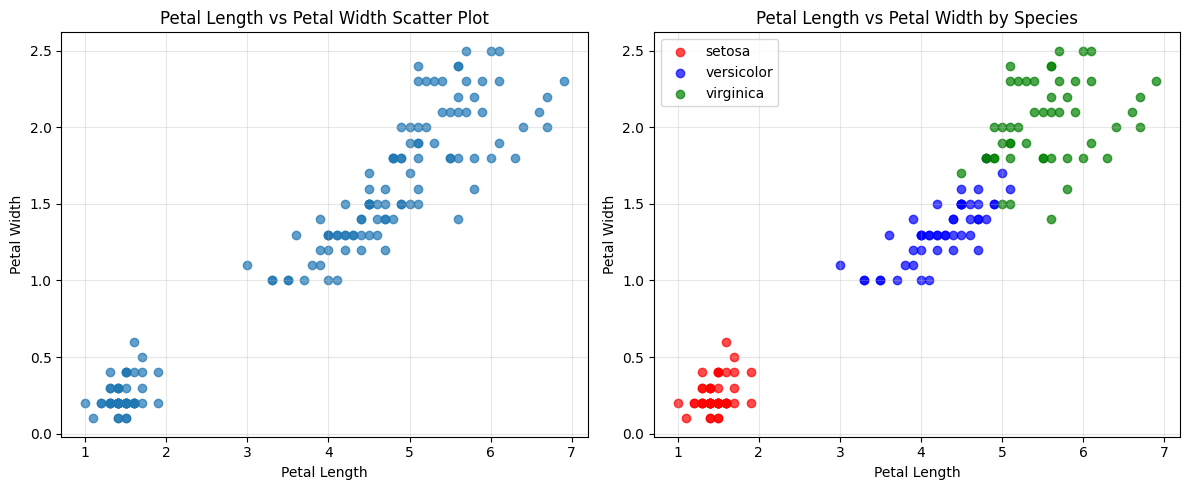

Correlation coefficient between petal length and width: 0.9629


In [6]:
# Plot scatter plot of petal width vs petal length
plt.figure(figsize=(12, 5))

# First subplot: Basic scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['Petal.Length'], df['Petal.Width'], alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width Scatter Plot')
plt.grid(True, alpha=0.3)

# Second subplot: Scatter plot colored by species
plt.subplot(1, 2, 2)
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Petal.Length'], species_data['Petal.Width'],
                c=colors[species], label=species, alpha=0.7)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width by Species')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Petal.Length'].corr(df['Petal.Width'])
print(f"Correlation coefficient between petal length and width: {correlation:.4f}")

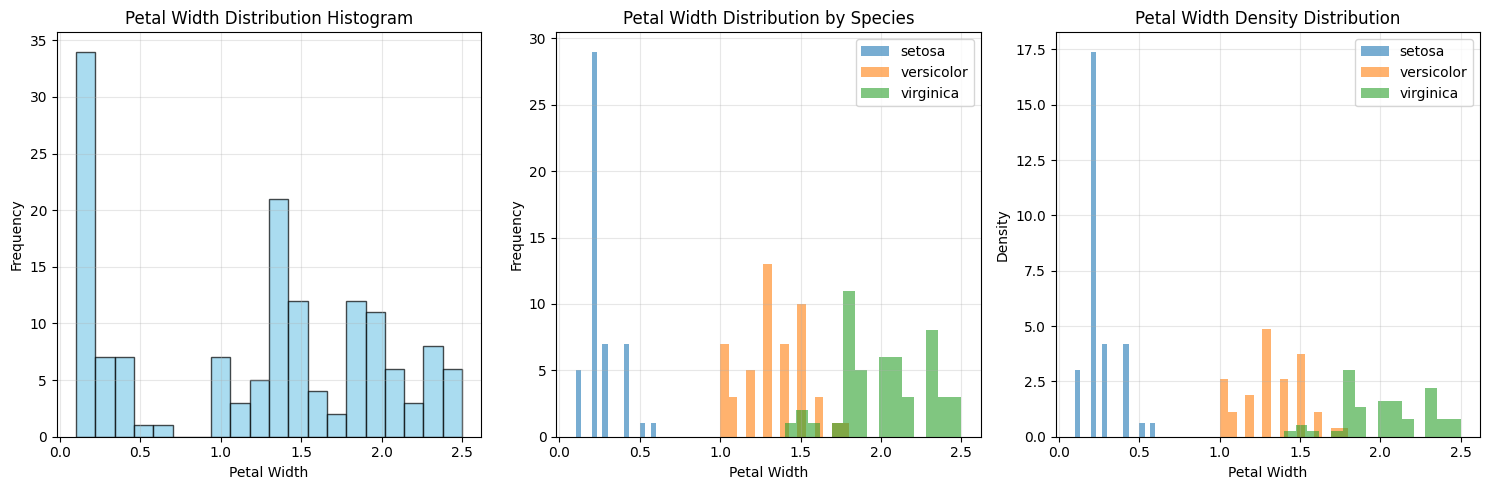

Petal Width Statistics:
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal.Width, dtype: float64

Petal Width Statistics by Species:
            count   mean       std  min  25%  50%  75%  max
Species                                                    
setosa       50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5


In [7]:
# Plot histogram of petal width
plt.figure(figsize=(15, 5))

# First subplot: Overall histogram
plt.subplot(1, 3, 1)
plt.hist(df['Petal.Width'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Petal Width Distribution Histogram')
plt.grid(True, alpha=0.3)

# Second subplot: Histogram grouped by species
plt.subplot(1, 3, 2)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]['Petal.Width']
    plt.hist(species_data, bins=15, alpha=0.6, label=species)

plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Petal Width Distribution by Species')
plt.legend()
plt.grid(True, alpha=0.3)

# Third subplot: Density plot
plt.subplot(1, 3, 3)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]['Petal.Width']
    plt.hist(species_data, bins=15, alpha=0.6, density=True, label=species)

plt.xlabel('Petal Width')
plt.ylabel('Density')
plt.title('Petal Width Density Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Petal width statistics
print("Petal Width Statistics:")
print(df['Petal.Width'].describe())

print("\nPetal Width Statistics by Species:")
print(df.groupby('Species')['Petal.Width'].describe())